# Simple Artificial Neural Network
Inspired by Welch Labs Neural Networks demystified

In [1]:
# Package for scientific computing
import numpy as np

In [2]:
# Make up sample data for our training

# Independent/predictor variables ([hours sleep, hours study])
X = np.array(([7, 2],[8, 1],[4, 0], [9, 3], [7, 1], [8, 3]), dtype=float)

# Dependent/predicted variables (score in test)
y = np.array(([85], [84], [70], [98], [80], [92]), dtype=float)

In [3]:
X

array([[ 7.,  2.],
       [ 8.,  1.],
       [ 4.,  0.],
       [ 9.,  3.],
       [ 7.,  1.],
       [ 8.,  3.]])

In [4]:
y

array([[ 85.],
       [ 84.],
       [ 70.],
       [ 98.],
       [ 80.],
       [ 92.]])

In [5]:
# Data optimization for better performance 

# Feature scaling
X = X / np.amax(X, axis = 0)
y = y / 100 # 100 would be the max score

# Mean normalisation
X = X - np.mean(X, axis=0)
y = y - np.mean(y, axis=0)

In [6]:
X

array([[-0.01851852,  0.11111111],
       [ 0.09259259, -0.22222222],
       [-0.35185185, -0.55555556],
       [ 0.2037037 ,  0.44444444],
       [-0.01851852, -0.22222222],
       [ 0.09259259,  0.44444444]])

In [7]:
# 2D plotting library
import matplotlib.pyplot as plt

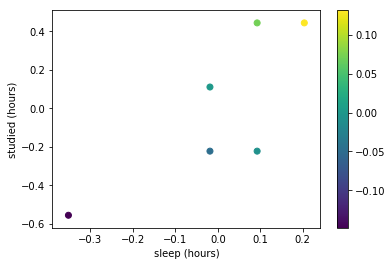

In [8]:
# Visualizing our data for some data exploration ;)
plt.scatter(X[:, 0], X[:,1], c=y[:,0])
plt.xlabel('sleep (hours)')
plt.ylabel('studied (hours)')
plt.colorbar()
plt.show()

In [9]:
X

array([[-0.01851852,  0.11111111],
       [ 0.09259259, -0.22222222],
       [-0.35185185, -0.55555556],
       [ 0.2037037 ,  0.44444444],
       [-0.01851852, -0.22222222],
       [ 0.09259259,  0.44444444]])

In [10]:
# Define a sigmoid function for illustration
def sigmoid(z):
     return 1/(1+np.exp(-z))

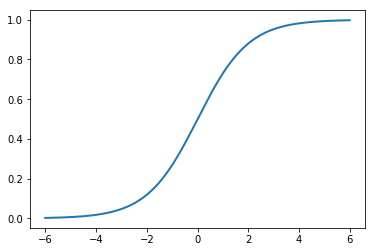

In [11]:
# Test our sigmoid function
testInput = np.arange(-6, 6, 0.01) 
plt.plot(testInput, sigmoid(testInput), linewidth=2)
plt.show()

In [32]:
# Implement the neural network class
class NeuralNetwork(object):
    
    def __init__(self):
        
        # Define some hyper-parameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Randomly initilization of the weights
        self.W1 = np.random.randn(self.inputLayerSize,  \
                                 self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                 self.outputLayerSize)
        
    # Forward Propagation
    def forward(self, X):
        
        # Propagate inputs through our net
        self.z2 = np.dot(X, self.W1)
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = sigmoid(self.z3)
        return yHat
        
    # And now our cost function derivative with respect to W1 and W2
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)

        delta3 = np.multiply(-(y-self.yHat), sigmoidPrime(self.z3))
        djdW2 = np.dot(self.a2.T, delta3)

        delta2 = np.dot(delta3, self.W2.T) * sigmoidPrime(self.z2)
        djdW1 = np.dot(X.T, delta2)

        return djdW1, djdW2
    

# Activation function
def sigmoid(z):
     return 1/(1+np.exp(-z))

# Define the first derivative of our sigmoid function
def sigmoidPrime(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

<img src="http://www.bogotobogo.com/python/scikit-learn/images/NeuralNetwork1/NN-with-components-w11-etc.png" />

In [35]:
# Test our neural network
NN = NeuralNetwork()
yHat = NN.forward(X)

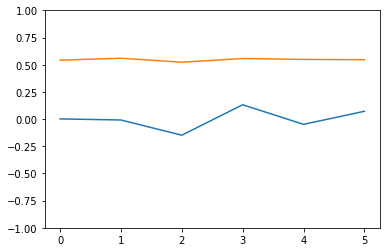

In [36]:
# Compare our result to the real values
plt.plot(y)
plt.plot(yHat)
plt.ylim(-1,1)
plt.show()

In [37]:
# Maybe we should train our network first
# Not everything is born with a silber spoon!

In [38]:
# We just start with trying 1000 different 
# values for two different weights

import time

weightsToTry = np.linspace(-10, 10, 1000)
costs = np.zeros((1000, 1000))

startTime = time.clock()
for i in range(1000):
    for j in range(1000):
        NN.W1[0,0] = weightsToTry[i]
        NN.W1[0,1] = weightsToTry[j]
        yHat = NN.forward(X)
        costs[i] = .5 * np.sum((y-yHat) ** 2)
    
print('Calculated 1000 different weights in %.3f seconds' % (time.clock() - startTime))

Calculated 1000 different weights in 18.437 seconds


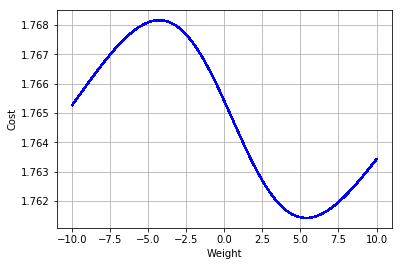

In [17]:
# Print the different values and their cost

plt.plot(weightsToTry, costs, c='blue')
plt.grid(1)
plt.ylabel('Cost')
plt.xlabel('Weight')
plt.show()

In [18]:
# Premature optimization is the root of all evil (D. Knuth)
# So why do wee need Backpropagation?

# If we would try to calculate 1000 different values for all our 9 weights that would be:
seconds = (22 * (1000 ** (9-1)))
print('The calculation would take {:,.3} years'.format((seconds / (60 * 60 * 24 * 36))))

The calculation would take 7.07e+18 years


In [20]:
# Remember the age of the universe
print('(The age of the universe is somwhere around 13.8e+9 years)')

(The age of the universe is somwhere around 13.8e+9 years)


In [21]:
# So, bruteforce does not work 
# (and we let numerical gradient evaluation out of the game)

Our functions until now are

$$z^{(2)} = XW^{(1)} $$

$$a^{(2)} = f(z^{(2)}) $$

$$z^{(3)} = a^{(2)}W^{(2)} $$

$$\hat{y} = f(z^{(3)}) $$

$$J = \sum_{}\frac{1}{2} (y-\hat{y})^2 $$

And we can plug these all toghether and expand our cost function:

$$J = \sum_{}\frac{1}{2} (y-f(f(XW^{(1)})W^{(2)}))^2 $$



So we have our cost function which we like to minimize. So which way is downhill? We could calculate different values and compare their cost. This is called numerical gradient estimation. But instead we can call our good friend calculus to calculate the rate of change of J in respect to W - derivative:

$$\frac{dJ}{dW}$$

And because we only consider one weight at a time, this is the partial derivative:

$$\frac{\partial J}{\partial W}$$

Calculus and some applications of sum and chain rules leads us to the following equations for our partial derivatives:

$$\frac{\partial J}{\partial W^{(2)}} = (a^{(2)})^{T}\delta ^{(3)}$$

$$\delta^{(3)} = -(y - \hat{y})f'(z^{(3)})$$ 

$$ \frac{\partial J}{\partial W^{(1)}} = X^T \delta^{(3)}(W^{(2)})^T f'(z^{(2)})$$

And differentiation of our sigmoid activation function leads us:

$$f'(z) = \frac{e^{-z}}{(1+e^{-z})^2}$$

We define our sigmoid prime function in our neural network class...

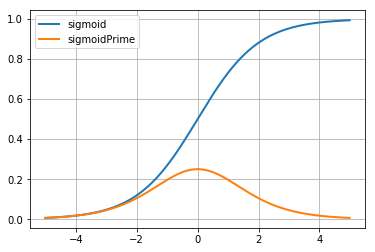

In [45]:
# Some visual verification
testValues = np.arange(-5, 5, 0.01) 
plt.plot(testValues, sigmoid(testValues), linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])
plt.show()

So we can now calculate which way is uphill in our n-dimensional features space:

In [41]:
NN = NeuralNetwork()
cost1 = NN.forward(X)

djdW1, djdW2 = NN.costFunctionPrime(X, y)

In [42]:
djdW1

array([[-0.00061407,  0.00275955, -0.00013743],
       [-0.00180169,  0.00594617, -0.00030235]])

In [43]:
djdW2

array([[ 0.31512755],
       [ 0.32559945],
       [ 0.32569546]])

If we know move in this way be adding a scalar times our derivatives to all our weights our cost increases:

In [53]:
scalar = 3
NN.W1 = NN.W1 + scalar * djdW1
NN.W2 = NN.W2 + scalar * djdW2

cost2 = NN.forward(X)
print(np.sum(cost1), np.sum(cost2))

2.6266496327 5.89998424827


TODO: Implement costfunction the right way, this is not correct. We have to return y-yHat ???
We don't have costFunction yet.

If we subtract a scala times our weights our cost decreases

In [48]:
NN.W1 = NN.W1 - scalar * djdW1
NN.W2 = NN.W2 - scalar * djdW2

cost3 = NN.forward(X)
print(np.sum(cost2), np.sum(cost3))

4.60745488113 2.6266496327
